# Digit Recognizer with the MNIST data



### Goal

For this project, we work with work with the MNIST DataSet obtained from Kaggle: https://www.kaggle.com/c/digit-recognizer/data. Using a Deep Learning neural network, our goal here will be to predict the Digit on images. 

### The Dataset

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.



# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import the dataset

Since the data is already split lets unpack it with x_train, y_train,x_test, y_test

In [2]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# The data

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

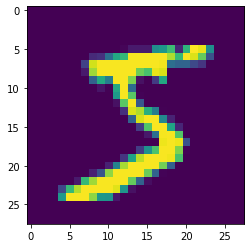

In [5]:
plt.imshow(X_train[0])

# Exploratory Data Analysis

Exploratory data analysis! Since we will be attempting to predict the digit on images, lets create some plot in order to get a better comprehension of the dataset.

## Checking for data distribution with test data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

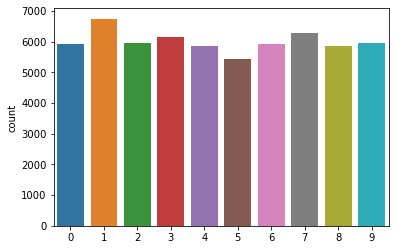

In [6]:
sns.countplot(y_train)

## Checking for NULL value

In [7]:
X_train[np.isnan(X_train)]

array([], dtype=uint8)

# Data Processing

We now needo make sure the labels will be understandable by our CNN since its a categorical probleme and we dont want to model to think the test set is continous variable

## Encoding Our output


In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
print(y_train)
print(y_test)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


In [10]:
print(y_train.shape)

(60000,)


In [11]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [12]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

now that we encoded the output, our model will understand that we want to perform a multiclass probleme

## Scalling X (3d array with MinMax Scaller)

Since we max number is 255, lets devide X by it for us to have number dans range from 0 to 1

In [13]:
print(X_train.min())
print(X_train.max())

0
255


In [15]:
X_train = X_train/255
X_test = X_test/255

In [16]:
scaled_single = X_train[0]

In [17]:
scaled_single

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [18]:
print(scaled_single.max())
print(scaled_single.min())

1.0
0.0


### Making sure data is good and ready for the  model 

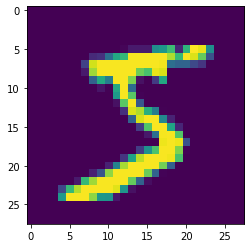

In [19]:
plt.imshow(scaled_single)

## Reshaping the Data to add the 1 dimention since we are dealing with black and white

In [20]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [21]:
X_train = X_train.reshape(60000, 28, 28, 1)

In [22]:
X_test = X_test.reshape(10000,28,28,1)

In [23]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Creating CNN Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [25]:
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))

model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(160, activation='relu'))


model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])




In [26]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## CNN Model info

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 160)               737440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1610      
Total params: 739,594
Trainable params: 739,594
Non-trainable params: 0
_________________________________________________________________


## Fit CNN

In [28]:
model.fit(X_train,y_cat_train,epochs=10,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2934 - accuracy: 0.9119 - val_loss: 0.0580 - val_accuracy: 0.9811
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0503 - accuracy: 0.9836 - val_loss: 0.0400 - val_accuracy: 0.9871
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0297 - accuracy: 0.9908 - val_loss: 0.0384 - val_accuracy: 0.9872
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0185 - accuracy: 0.9941 - val_loss: 0.0357 - val_accuracy: 0.9876
Epoch 5/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.0125 - accuracy: 0.9961 - val_loss: 0.0424 - val_accuracy: 0.9867
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0085 - accuracy: 0.9977 - val_loss: 0.0416 - val_accuracy: 0.9878


Early stop made us stop training at 6 epoch

## Evaluate the Model

In [30]:
losses = pd.DataFrame(model.history.history)

In [31]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.143800,0.957167,0.057955,0.9811
1,0.047460,0.984867,0.039975,0.9871
2,0.031195,0.990350,0.038413,0.9872
3,0.021033,0.993067,0.035745,0.9876
4,0.015440,0.995083,0.042447,0.9867


### Checking overfit with loss metric and accuracy

<AxesSubplot:>

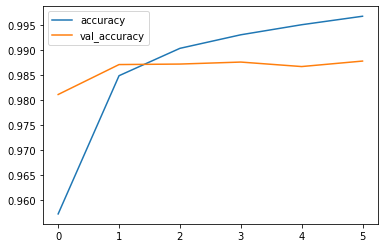

In [32]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

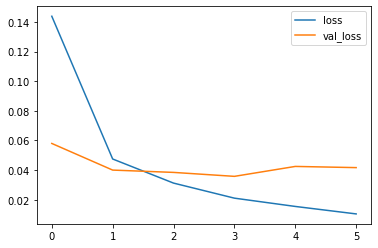

In [33]:
losses[['loss','val_loss']].plot()

In [35]:
print(model.metrics_names)
print(model.evaluate(X_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.041640445590019226, 0.9878000020980835]


## Prediction with test set

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
predictions = model.predict_classes(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [40]:
confusion_matrix(y_test,predictions)

array([[ 974,    1,    2,    1,    0,    0,    1,    0,    1,    0],
       [   0, 1129,    1,    3,    0,    0,    1,    0,    1,    0],
       [   1,    1, 1021,    0,    1,    0,    0,    7,    1,    0],
       [   0,    0,    2, 1002,    0,    0,    0,    1,    4,    1],
       [   0,    1,    1,    0,  975,    0,    0,    0,    0,    5],
       [   1,    0,    1,   12,    0,  872,    1,    0,    5,    0],
       [   8,    2,    0,    1,    3,    2,  938,    0,    4,    0],
       [   0,    1,    4,    1,    0,    0,    0, 1021,    1,    0],
       [   5,    0,    1,    1,    0,    0,    0,    0,  965,    2],
       [   3,    1,    0,    7,    5,    3,    0,    5,    4,  981]],
      dtype=int64)

# Trying prediction with a single image

In [43]:
Single_image = X_test[1]

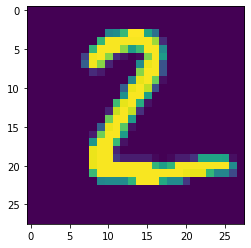

In [44]:
plt.imshow(Single_image.reshape(28,28))

In [48]:
print(model.predict_classes(Single_image.reshape(1,28,28,1)))

[2]


# Conclusion
Well with a 99% precision,recall and f1-score, i think its pretty clear that our model works and we succed the task.